<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/11_OurConvolutionNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# NEURAL NETWORKS DO NOT DO DATA CLEANING!

# IF TF prefers channels _Last-> we need to arrange our images before passing to NN
# THEANO -> Channels_first -> WE need to arrange our images


# in our NLP problem -> preprocessed sentences were analyzed
# in our CV problems-> images are preprocessed 
!ls


data  sample_data


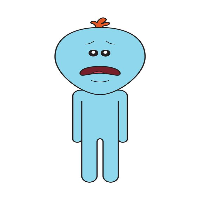

In [0]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('000003.jpg')
img_resized = cv2.resize(img, (200,200)) # SMALL DISTORTION are WELCOME! 
cv2_imshow(img_resized)

In [0]:
img_resized[0] # EACH element is a LIST of 3 elements -> CHANNEL value-> 3 channels
img_resized.shape

(200, 200, 3)

In [0]:
img_resized[5][0] # 5th row, 0th column

# uint8 -> each channel is unsigned (no negative signs) and 8 bit in size 

array([255, 255, 255], dtype=uint8)

In [6]:
import numpy as np
from keras import backend # backend -> tf/theano etc
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential # no parallel, no cycles 

# TF can create all = DAG, DCG, IAG, ICG 

Using TensorFlow backend.


In [0]:
# SUCH networks can be VERY large and usually only 1 instance runs 
# otherwise RAM will be cluttered and all will crash! (OS+model+harddisk)

# NO MORE THAN 1 INSTANCE of such programs should be RUNNING! 

# SINGLETON -> class which can have ONLY 1 instance -> TASK MANAGER! 

In [0]:

 # the method declared after @st... will be STATIC
  # ONLY 1 copy of it will RUN from the beginning till the end of program
  # STATIC keyword -> STATIC MEANS ALWAYS PRESENT (Static CURRENT!)

  # DEPTH = Channel depth = channel dimension = no. of channels 
  #                       
# KERAS needs us to arrange -> IMAGE STRUCTURE 
    # Tensorflow -> CHANNEL_LAST -> (height, width, depth)
    # Theano -> CHANNEL_FIRST -> (depth, height, width)
    # https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/


# PandaVGG = ((Conv + ReLU + BN) + MP + Dropout + ( (Conv + ReLU + BN) + MP + Dropout)XN
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

class PandaVGG:
  @staticmethod
  def build( height, width, depth, classes) :
  
    # let's assume we are on TF, else we will switch to Theano 
    inputShape = (height, width, depth)
    channel_dim = -1  # last element -> CHANNELS_LAST 
    if backend.image_data_format() == 'channels_first':
      inputShape = (depth, height, width)
      channel_dim = 1
    # { data, representation } => [data,representation] or [representation, data]
    #  { images, channels}     => channels_last or channels_first 
    # data -> 2 d images -> height [row], width [columns] 

    HP_block1_conv_dim = 32    
    HP_small_pattern = (3,3)
    HP_block2_conv_dim = 64
    HP_block3_conv_dim = 128
    HP_block4_conv_dim = 256
    HP_block5_dense_dim = 1024
    HP_large_pattern = (2,2)
    HP_dropout_type1 = 0.25
    HP_dropout_type2 = 0.50
    
    model = Sequential()
# PandaVGG = (Conv + ReLU + BN) + MP + Dropout + ((Conv + ReLU + BN)X2 + MP + Dropout) X N
#             + (Flatten + Dense(ReLu) + Dense(SoftMax))

    # block1 starts-> (Conv + ReLU + BN) + MP + Dropout 
    model.add(Conv2D(HP_block1_conv_dim, HP_small_pattern, padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim)) # our data needs to be normalized, not our channels!!!
    model.add(MaxPooling2D(pool_size=HP_small_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block1 complete 

    #block2 starts -> (Conv + RelU + BN) X2   + Compress + Drop 
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block2_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # BLock 2 ends 

    #Block3 starts
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block3_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block3 ends

    #Block4 starts
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(Conv2D(HP_block4_conv_dim,HP_small_pattern, padding='same' ))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dim))
    model.add(MaxPooling2D(pool_size=HP_large_pattern))
    model.add(Dropout(HP_dropout_type1))
    # block4 ends

    # final block5- classification/prediction
    model.add(Flatten())
    model.add(Dense(HP_block5_dense_dim))
    model.add(Activation('relu'))
    # optional: Batch Normalization and Dropout -> to avoid overfitting 
    model.add(BatchNormalization())
    model.add(Dropout(HP_dropout_type2))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    # final block ends

    return model




In [0]:
 # BATCH NORMALIZATION FUN FACT 
    # we will be calculating -> mu and sigma for normalization 
    # parameters will be generated
    # but in back/prop-> IS my data(images) changing? if my data is not changing
    # then mu and sigma for that data/batch will not change!!! 
    # Non-TRAINABLE parameters -> that cannot be trained -> back-prop's differentiation 
    # will NOT change their value! 

In [0]:
# https://1drv.ms/u/s!AhM-uOEWdqAeqG9rJT9XKZp62sCj?e=hl5sKg
# https://1drv.ms/u/s!AhM-uOEWdqAexWFgIl-sNiHnq0JM?e=V3cG4m

# Pattern Recognition: pattern recognition by Sergios Theodoridis, Konstantinos

In [0]:
# CONVOLUTIONAL neural networks + Recurring Networks + Lot of unknown stuff = Brain

In [0]:
# Color theory: https://www.springer.com/gp/book/9780792399285

# Concious / Unconcious -> myth 
# Cerebrum, Cerebellum, Corpus callosum, medulla -> Biologist 
# biologist and neurologist -> CLASSFIED brains into activities
# 
# They are now proven to be partial knowledges!

# Optical nerve was working fine but postoral lobe responsible for
# vision was damaged 

# Neurosurgeons -> clipped optical nerve and connected to a different segment of brain
# within matter of months, BRAIN taught itself to SEE from the area where it was not supposed
# to! 

# BRAIN -> Weights and BIASES and unknown parameters! 

In [0]:
from keras.applications.vgg16 import VGG16

model = VGG16()
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________